In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter

import os
from dotenv import load_dotenv

from yt_client.yt_client import YouTubeClient

In [72]:
load_dotenv()

YT_API_KEY = os.getenv("YT_API_KEY")

# Getting videos by keyword (use carefully and as less as possible since very expensive request)

## Keyword
Anything related to the topic you are looking videos for

## Pub dates
Consider the strict format below, we can filter videos by date

## Returns LIST of videos
You can choose any video from the list and get comments for this video

In [73]:
keyword = "cárteles de México"
published_after = "2023-10-01T00:00:00Z"
published_before = "2023-10-31T23:59:59Z"

keyword_videos = YouTubeClient(api_key=YT_API_KEY).get_videos_by_keyword(
    keyword=keyword,
    published_after=published_after,
    published_before=published_before
)

print(f'Got {len(keyword_videos)} videos for keyword "{keyword}"')

2025-04-16 18:38:41,104 INFO Connected to thesis database on 206.81.16.39
2025-04-16 18:38:41,311 INFO Got 249 videos for cárteles de México from mongo


Got 249 videos for keyword "cárteles de México"


# By username - handle
https://www.youtube.com/@MilitarMente
Here MilitarMente is handle

## Same logic as before but this request is cheaper

In [74]:
# This is a channel that posts videos about cartels
handle = "MilitarMente"

channel_videos = YouTubeClient(api_key=YT_API_KEY).get_videos_by_handle("MilitarMente")
print(f'Got {len(channel_videos)} videos for channel "{handle}"')

2025-04-16 18:38:41,627 INFO Connected to thesis database on 206.81.16.39
2025-04-16 18:38:41,743 INFO Got 100 videos for MilitarMente from mongo


Got 100 videos for channel "MilitarMente"


In [75]:
# As an example, let's take the first video
target_video = channel_videos[0]

comments = YouTubeClient(api_key=YT_API_KEY).get_comments_by_video_id(target_video["_id"]["videoId"])
print(f'Got {len(comments)} comments')

2025-04-16 18:38:42,062 INFO Connected to thesis database on 206.81.16.39
2025-04-16 18:38:42,218 INFO Got 100 comments for video h9njff2Eyrg from mongo


Got 100 comments


In [76]:
# To show how comment looks like
target_comment = comments[0]["snippet"]["topLevelComment"]["snippet"]

# As an example - comments by day

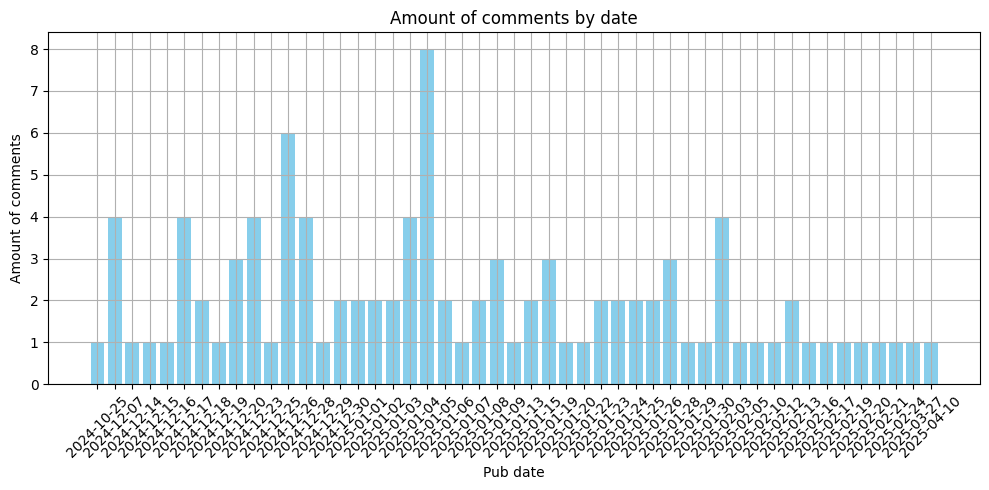

In [81]:
dates = []
for comment in comments:
    published_str = comment["snippet"]["topLevelComment"]["snippet"]["publishedAt"]
    if published_str:
        try:
            published_datetime = datetime.strptime(published_str, "%Y-%m-%dT%H:%M:%SZ")
            dates.append(published_datetime.date().isoformat())
        except ValueError as e:
            print(f"Ошибка парсинга даты {published_str}: {e}")
date_counts = Counter(dates)

sorted_dates = sorted(date_counts.keys())
counts = [date_counts[date] for date in sorted_dates]

plt.figure(figsize=(10, 5))
plt.bar(sorted_dates, counts, color="skyblue")
plt.xlabel("Pub date")
plt.ylabel("Amount of comments")
plt.title("Amount of comments by date")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
total_comments = []
for video in channel_videos[15:25]:
    video_comments = YouTubeClient(api_key=YT_API_KEY).get_comments_by_video_id(video["_id"]["videoId"])
    total_comments += video_comments


2025-04-16 18:38:42,714 INFO Connected to thesis database on 206.81.16.39
2025-04-16 18:38:42,828 INFO Got 49 comments for video ZcQGu0YpcrE from mongo
2025-04-16 18:38:43,145 INFO Connected to thesis database on 206.81.16.39
2025-04-16 18:38:43,257 INFO Got 38 comments for video erxqWyzaa8Q from mongo
2025-04-16 18:38:43,583 INFO Connected to thesis database on 206.81.16.39
2025-04-16 18:38:43,771 INFO Got 100 comments for video ZK98DXomIG0 from mongo
2025-04-16 18:38:44,076 INFO Connected to thesis database on 206.81.16.39
2025-04-16 18:38:44,228 INFO Got 100 comments for video Vd2FZz-vje0 from mongo
2025-04-16 18:38:44,583 INFO Connected to thesis database on 206.81.16.39
2025-04-16 18:38:44,734 INFO Got 100 comments for video emXdfiKh9Gs from mongo
2025-04-16 18:38:45,045 INFO Connected to thesis database on 206.81.16.39
2025-04-16 18:38:45,163 INFO Got 87 comments for video ynUpBXTtElc from mongo
2025-04-16 18:38:45,521 INFO Connected to thesis database on 206.81.16.39
2025-04-16 

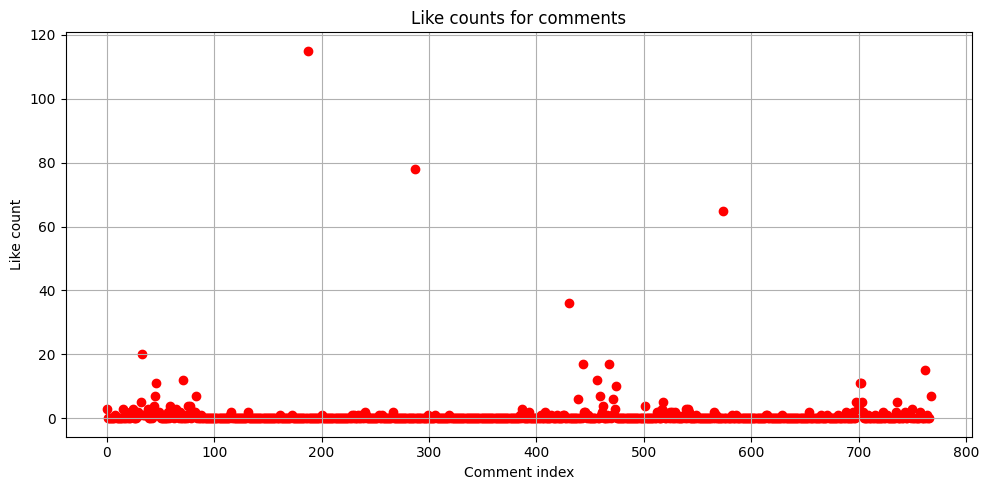

In [84]:
like_counts = []
for comment in total_comments:
    like_count = comment["snippet"]["topLevelComment"]["snippet"]["likeCount"]
    like_counts.append(int(like_count))

plt.figure(figsize=(10, 5))
plt.scatter(range(len(like_counts)), like_counts, color="red")
plt.xlabel("Comment index")
plt.ylabel("Like count")
plt.title("Like counts for comments")
plt.grid(True)
plt.tight_layout()
plt.show()